#### (Perceptron) Using the make blobs function in sklearn generate a dataset of 100 points with two classes. Write the perceptron algorithm by scratch and show the intermediate hyperplanes generated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs, make_circles

In [2]:
# generate 2 classes sample data of size 100
x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=2)

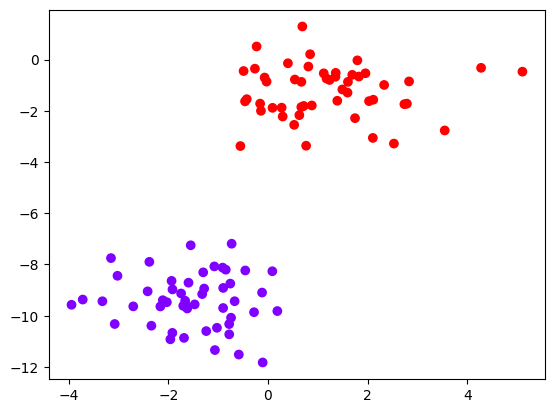

In [3]:
# plot the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')

In [4]:
# Augment the data with a column of ones
x = np.hstack((np.ones((x.shape[0], 1)), x))

In [7]:
# write perceptron algorithm
def perceptron(x, y, lr=1, epochs=100):
    w = np.random.randn(x.shape[1])
    while True:
        for i in range(len(x)):
            curr = np.dot(x[i], w)
            if curr > 0 and y[i] == 0:
                w -= lr * x[i]
            elif curr < 0 and y[i] == 1:
                w += lr * x[i]
        epochs-=1

        isCorrectlyClassified = True
        for i in range(len(x)):
            curr = np.dot(x[i], w)
            if curr > 0 and y[i] == 0:
                isCorrectlyClassified = False
            elif curr < 0 and y[i] == 1:
                isCorrectlyClassified = False
        
        if epochs:
            # plot the line and points
            plt.scatter(x[:, 1], x[:, 2], c=y, cmap='rainbow')
            x1 = np.linspace(-10, 10, 100)
            x2 = -(w[0] + w[1] * x1) / w[2]
            plt.plot(x1, x2, 'k-')
            plt.show()

        if isCorrectlyClassified or epochs == 0:
            break

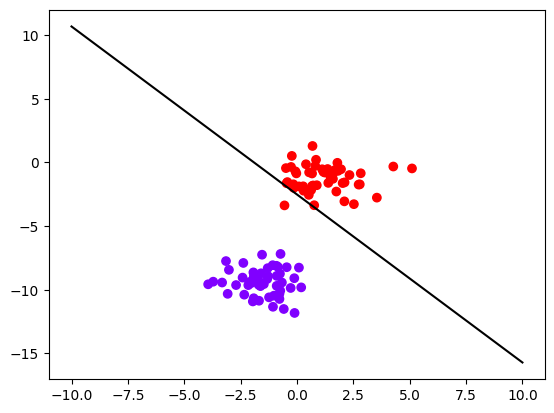

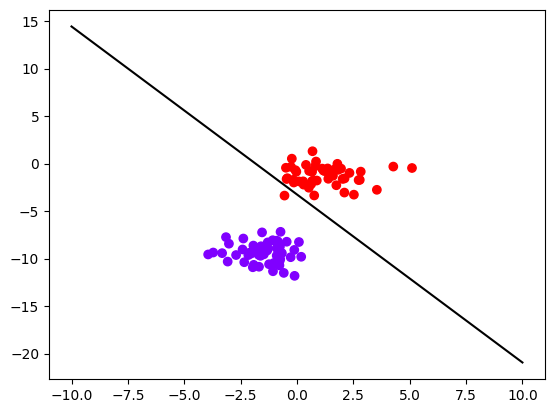

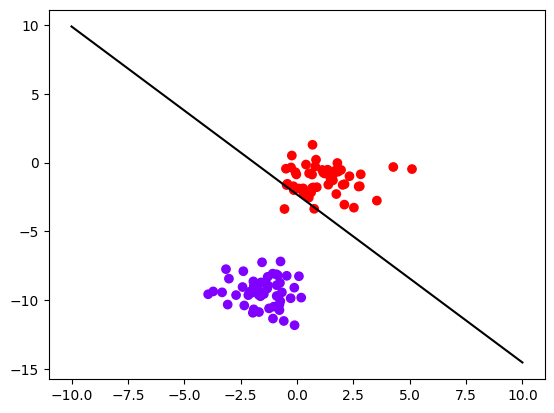

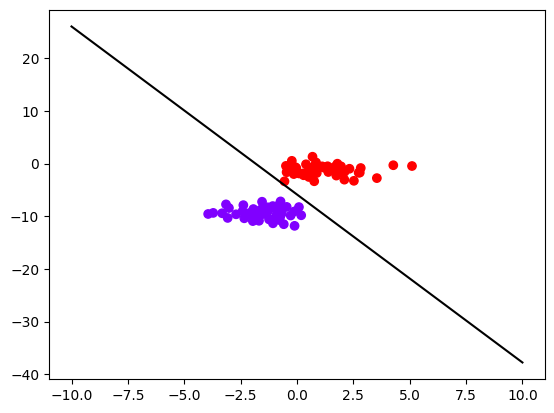

In [8]:
perceptron(x, y)

#### (Perceptron) Repeat the above exercise with batch gradients instead. Step size might need to be adjusted for convergenence.

#### (Perceptron) Using the make circles function in sklearn generate two classes so that they form different concentratic circles. Generate 100 points. Create second order features and train the perceptron. Using the contour function show the final decision boundary in the original two dimensional space.

In [12]:
# create a dateset of size 100 with 2 classes 
x, y = make_circles(n_samples=100, noise=0.1, factor=0.2, random_state=2)

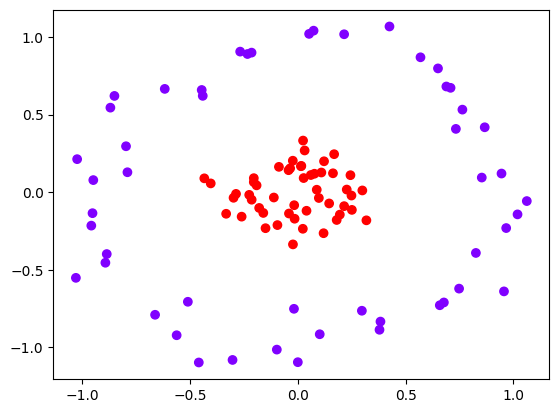

In [13]:
# plot the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')

In [14]:
data = np.ones((len(x), 6))
data[:, 1:3] = x
data[:,3] = x[:,0]**2
data[:,4] = x[:,1]**2
data[:,5] = x[:,0]*x[:,1]

In [11]:
# create a data with x and second order features of x
# x = np.hstack((np.ones((x.shape[0], 1)), x, x[:, 0:1] ** 2, x[:, 1:2] ** 2, x[:,0]*x[:,1]))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 4 has 1 dimension(s)

In [15]:
data

array([[ 1.00000000e+00, -2.98317257e-01, -3.61481340e-02,
         8.89931859e-02,  1.30668759e-03,  1.07836122e-02],
       [ 1.00000000e+00, -8.92767532e-01, -4.55117292e-01,
         7.97033866e-01,  2.07131749e-01,  4.06313941e-01],
       [ 1.00000000e+00,  8.76118258e-02,  1.58557413e-02,
         7.67583201e-03,  2.51404531e-04,  1.38915044e-03],
       [ 1.00000000e+00, -1.02381378e+00,  2.13073127e-01,
         1.04819466e+00,  4.54001576e-02, -2.18147205e-01],
       [ 1.00000000e+00, -2.67618529e-01,  9.06723243e-01,
         7.16196771e-02,  8.22147040e-01, -2.42655941e-01],
       [ 1.00000000e+00, -7.90532321e-01,  1.28594344e-01,
         6.24941350e-01,  1.65365053e-02, -1.01657985e-01],
       [ 1.00000000e+00,  8.53077593e-01,  9.43449935e-02,
         7.27741380e-01,  8.90097780e-03,  8.04836000e-02],
       [ 1.00000000e+00, -9.58103640e-01, -2.15724676e-01,
         9.17962584e-01,  4.65371360e-02,  2.06686598e-01],
       [ 1.00000000e+00, -8.86483200e-01, -3.990

In [18]:
# write perceptron algorithm for non-linearly separable data
def nonlinear_perceptron(x, y, eps = 0.01,lr=1, epochs=100):
    error = 1
    w = np.random.randn(x.shape[1])
    while error > eps:
        error = 0
        for i in range(len(x)):
            curr = np.dot(x[i], w)
            if curr > 0 and y[i] == 0:
                w -= lr * x[i]
                # error += 1
            elif curr < 0 and y[i] == 1:
                w += lr * x[i]
                # error += 1
        epochs-=1

        isCorrectlyClassified = True
        for i in range(len(x)):
            curr = np.dot(x[i], w)
            if curr > 0 and y[i] == 0:
                isCorrectlyClassified = False
                error += curr
            elif curr < 0 and y[i] == 1:
                isCorrectlyClassified = False
                error -= curr
        
        if epochs % 20:
            def J(x, y):
                t = -(w[0] + w[1]*x + w[2]*y + w[3] * (x)**2 + w[4]*(y)**2 + w[5]*(x*y))
                return (t >= 0)

            xmin = min(data[:, 1])
            xmax = max(data[:, 1])
            ymin = min(data[:, 2])
            ymax = max(data[:, 2])    
            xx = np.linspace(xmin,xmax)
            yy = np.linspace(ymin, ymax)
            P, Q = np.meshgrid(xx, yy)
            zz = J(P, Q)
                
            plt.figure(figsize = (10,8))
            plt.contour(xx, yy, zz)
            c = ['r' if i == 1  else 'b' for i in y]
            plt.scatter(x[:,0], x[:,1], color = c)
            plt.title('Perceptron for non-linearly seperable')
            plt.show()

        # if isCorrectlyClassified or epochs == 0:
        #     break
    

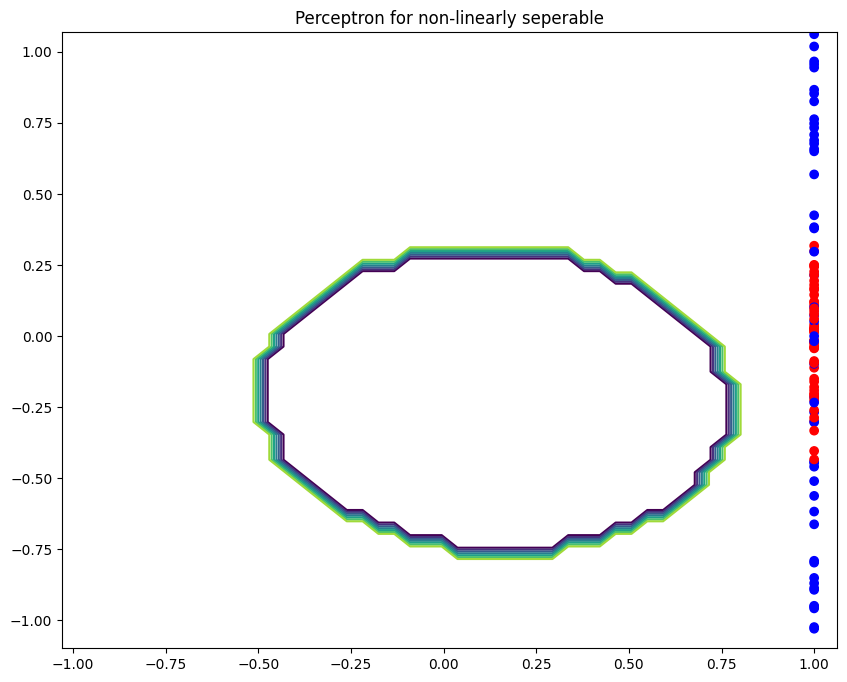

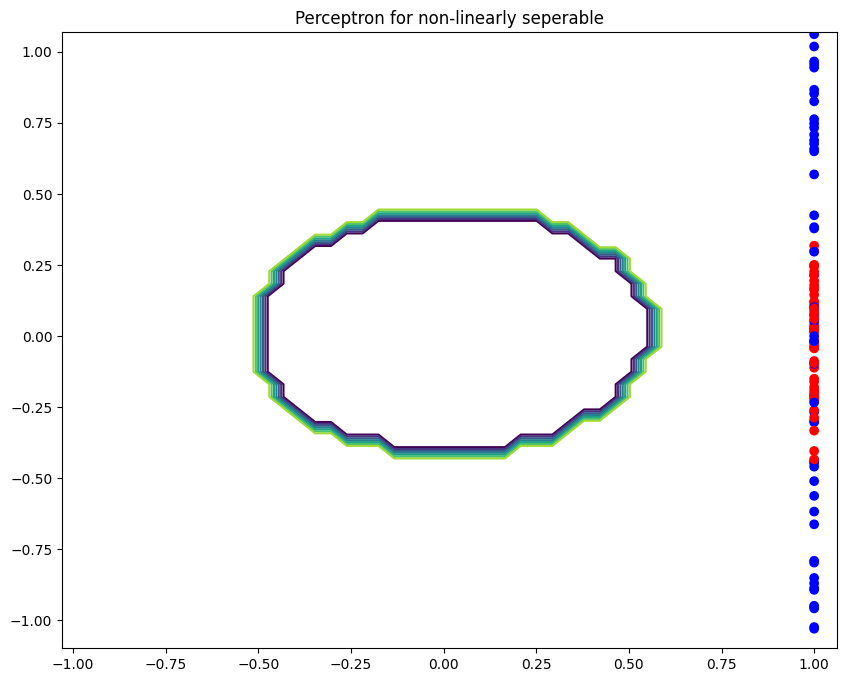

In [20]:
nonlinear_perceptron(data, y)